In [8]:
import data_loader

suj_data_loader = data_loader.StartUpJobsDataLoader()
skill_column_flat = suj_data_loader.load_skills_data()

In [17]:
import pandas
skill_column_expanded = skill_column_flat["level"].apply(pandas.Series)
skill_column_flat_merged = skill_column_flat.merge(right=skill_column_expanded, left_index=True, right_index=True)
skill_column_flat_merged = skill_column_flat_merged.drop(columns=["level"])
skill_column_flat_merged = skill_column_flat_merged.dropna()
skill_column_flat_merged = skill_column_flat_merged.explode("skills")
skill_column_flat_merged

,skills,junior,medior,senior
0,English,1,1,0
0,SQL,1,1,0
0,Web Analytics,1,1,0
0,Google Analytics,1,1,0
1,JavaScript,0,0,1
...,...,...,...,...
950,Data Structures,0,0,1
951,JavaScript,0,1,1
951,React JS,0,1,1
951,Redux,0,1,1


In [27]:
skill_column_flat_merged_grouped = pandas.DataFrame(skill_column_flat_merged.groupby("skills").sum())
skill_column_flat_merged_grouped["total"] = skill_column_flat_merged_grouped["junior"] + skill_column_flat_merged_grouped["medior"] + skill_column_flat_merged_grouped["senior"]
skill_column_flat_merged_grouped_top = skill_column_flat_merged_grouped.sort_values(by="total", ascending=False).head(10)
skill_column_flat_merged_grouped_top

,junior,medior,senior,total
skills,,,,
JavaScript,19,73,69,161
Communication Skills,20,34,24,78
React JS,7,30,35,72
HTML,9,30,26,65
PHP,8,23,30,61
Node.js,4,26,30,60
TypeScript,8,23,25,56
CSS,8,24,21,53
Project Management,7,21,23,51


<AxesSubplot:xlabel='skills'>

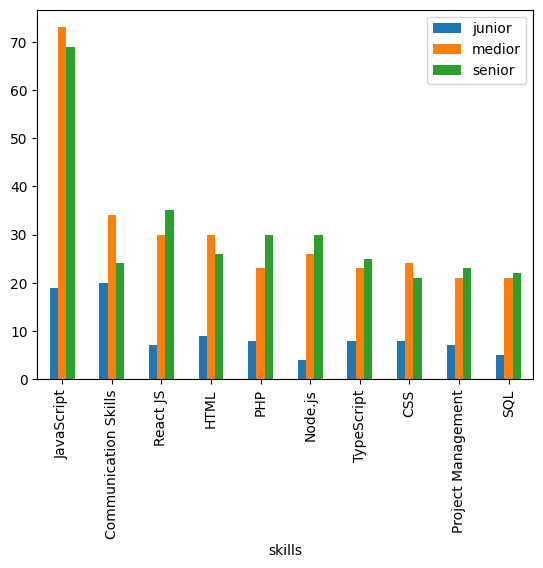

In [30]:
import matplotlib.pyplot as plt
skill_column_flat_merged_grouped_top[["junior", "medior", "senior"]].plot(kind="bar")